In [1]:
import csv
import matplotlib.pyplot as plt
import sys

import readgadget as rg 
import numpy as np
from scipy.spatial import cKDTree
from multiprocessing import Pool
import agama

In [2]:

from sphviewer.tools import QuickView

In [9]:
from IPython.core.display import HTML

HTML("""
<style>
    .CodeMirror, .output_subarea, .input{
        font-size: 20px;
    }
</style>
""")

In [10]:
def cent_h(X):


    # 构建 KD 树
    tree = cKDTree(X)  

    # 为每个点查询最近的30个邻居点
    dist, ind = tree.query(X, k=20)  

    # 计算局部密度
    epsilon = 1e-5
    rho = 1 / (dist + epsilon).sum(axis=1)

    # 密度最大值点的索引
    densest_idx = np.argmax(rho)

    return X[densest_idx]

def read(runpath,i):
    snapfname = runpath + 'snapshot_' + str(i).zfill(3) 

    pbulge = rg.readsnap(snapfname, 'pos', 'bulge')
    mbulge = rg.readsnap(snapfname, 'mass', 'bulge')
    phalo = rg.readsnap(snapfname, 'pos', 'dm')
    mhalo = rg.readsnap(snapfname, 'mass', 'dm')
    vbulge = rg.readsnap(snapfname, 'vel', 'bulge')
    return pbulge,vbulge,mbulge

In [17]:
def process_data(i):
    pbulge, vbulge, mbulge = read(runpath, i)
    cent = cent_h(pbulge)
    rbulge_cen = (((pbulge - cent) ** 2).sum(-1)) ** 0.5
    vgal = np.mean(vbulge[rbulge_cen <= 1., :], axis=0)
    rbulge_cen = (((pbulge - cent) ** 2).sum(-1)) ** 0.5
    bound_bulge = pbulge[rbulge_cen < 0.6] - cent
    return mbulge[0] * len(bound_bulge), i

def plot(runpath):
    ini_result = process_data(0)
    ini_mass = ini_result[0]
    
    pool = Pool(processes=64)  # 这里的数字可以根据你的CPU核心数进行调整
    results = pool.map(process_data, range(0, 320, 5))

    mass = [mass_val[0] / ini_mass for mass_val in results]
    t = [mass_val[1] / 50 for mass_val in results]

    return mass, t

In [18]:
mass=[]
t = []
plt.figure(figsize=(10, 6))
for i in [0,3]:
    runpath = '/home/guozx/GC/Output/highre_scale_'+str(i)+'/'
    M,t=plot(runpath)
    mass.append(M)
    

Returning BULGE Positions
Returning BULGE Mass
Returning DM    Positions
Returning DM    Mass
Returning BULGE Velocities
Returning BULGE PositionsReturning BULGE PositionsReturning BULGE PositionsReturning BULGE PositionsReturning BULGE PositionsReturning BULGE PositionsReturning BULGE PositionsReturning BULGE PositionsReturning BULGE PositionsReturning BULGE PositionsReturning BULGE PositionsReturning BULGE PositionsReturning BULGE PositionsReturning BULGE PositionsReturning BULGE PositionsReturning BULGE PositionsReturning BULGE PositionsReturning BULGE PositionsReturning BULGE PositionsReturning BULGE PositionsReturning BULGE PositionsReturning BULGE PositionsReturning BULGE PositionsReturning BULGE PositionsReturning BULGE PositionsReturning BULGE PositionsReturning BULGE PositionsReturning BULGE Positions

Returning BULGE Positions

Returning BULGE Positions

Returning BULGE PositionsReturning BULGE PositionsReturning BULGE Positions

Returning BULGE PositionsReturning BULGE Posit

<Figure size 1000x600 with 0 Axes>

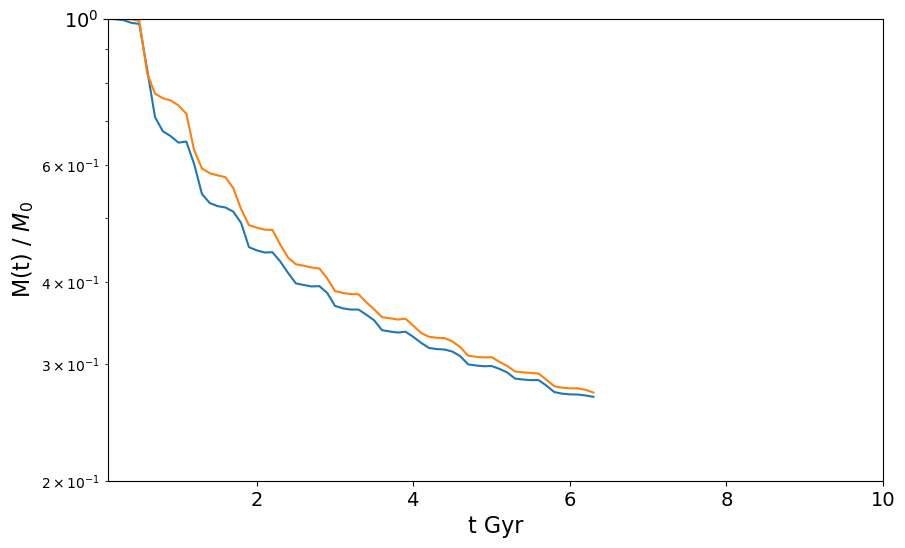

In [22]:
plt.figure(figsize=(10, 6))
for i in range(2):
    plt.plot(t,mass[i],label = r'e={:.1f}'.format(i/5+0.1))
plt.xlabel('t Gyr',fontsize=16)
plt.ylabel(r'M(t) / $M_0$',fontsize=16)
#plt.legend(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.ylim(0.2, 1)
plt.xlim(10**(-1.),10**(1))
plt.tick_params(axis='both', labelsize=14)